#** Ensemble Learning Business Case**

- This company is a leading ride-sharing platform, aiming to provide reliable, affordable, and convenient urban transportation for everyone.
- The constant challenge Company faces is the churn rate of its drivers. Ensuring driver loyalty and reducing attrition are crucial to the company's operation.
- Analyzing driver data can reveal patterns in driver behavior, performance, and
 satisfaction. This would help in foreseeing potential churn, allowing proactive
 measures.
- By leveraging data science and ensemble learning, Company can predict driver churn, which would be pivotal in its driver retention strategy.

**From the learner’s perspective:**
- Engaging with this case offers a practical understanding of how ride-sharing
 giants operate and the challenges they face.
- Ensemble learning, comprising various algorithms and techniques, can
 significantly improve prediction accuracy over standalone methods.
- This exercise hones the participant's skills in imputation, dealing with class
 imbalances, feature engineering, and model evaluation.
- Additionally, learners gain hands-on experience in tackling real-world problems, transforming raw data into actionable insights that can guide business strategies.

**Column Profiling:**

 1. **MMMM-YY**: Reporting month and year.
 2. **Driver_ID:** A unique identifier for every driver.
 3. **Age:** Age of the driver.
 4. **Gender:** Driver's gender. Male: 0, Female: 1.
 5. **City:** City code representing the city the driver operates in.
 6. **Education_Level:** Education level of the driver, categorized into 0 for 10+, 1 for 12+, and 2 for graduate.
 7. **Income:** Average monthly income of the driver.
 8.**Date Of Joining:** The date when the driver joined Company.
 9. **LastWorkingDate:** The most recent or final day the driver worked with Company.
 10.**Joining Designation:** Designation of the driver at the onset of their journey with Company.
 11. **Grade:** A grade assigned to the driver at the reporting time, likely denoting performance or other metrics.
 12.**Total Business Value:** The total monetary value (business) a driver brings in a month. Negative values might indicate cancellations, refunds, or other financial adjustments.
 13.**Quarterly Rating:** Rating assigned to drivers on a quarterly basis. Ratings range from 1 to 5, with 5 being the best

**Buisness Problem:**

Assuming you are a data scientist in this Company, you are entrusted with the responsibility of analyzing the dataset to predict driver attrition. Your primary goal is to utilize ensemble  learning techniques, evaluate the performance of your models, and provide actionable insights to reduce driver churn.

#**What does'good' looklike?**

##**1.Define Problem Statement and perform Exploratory Data Analysis**

**a. Definition of problem:**

 The main aim is to predict potential driver churn using multiple attributes to
 maintaina consistent driver base and ensure business continuity.
  - Hint: Star tby crystallizing the problem statement.What's the objective of Company?Why is predicting driver attritionsoimportant?

**b. Observations on Data:**

  - Use functions likedata.info(), data.describe(), and data.shape in Python Identify numeric versus categorical attributes.Convert categorical datatypes using astype('category') if needed.
  - Since we don't have a pre-defined targetvariable,we will create one based on certain conditions or behavior observed in the data.
  - Aggregating on 'driverid' might be essential to identify consistent behaviors or patterns.
    - Hint: A thorough understanding of the dataset structure is key.Observe  the shape of data, datatypes of all the attributes, conversion of categorical attributes to'category' (Ifrequired),missingvalue detection,statisticalsummary.

**c. Univariate Analysis:**

For continuous variables,use histograms or density plots.For categorical variables,usecountplots. Tools like Seaborn make these visualizations straight forward. This helps in understanding the distribution of individual variables.

  - Hint: Begin the analysis with individual variables.For continuous attributes,use distribution plots, and for categorical ones, use bar or countplots.

**d. Bivariate Analysis:**

Employ scatter plots for continuous-continuous relationships boxplots for categorical-continuous correlations, and crosstab or stackedbar plots for categorical-categorical correlations. For instance,understanding how a driver's ratings correlate with the frequency of rides can offer key insights.
  - Hint: Dive into relationships between two variables.(Relationships  between important variable).

**e. Illustrate the insights based on EDA:**

Take notes on surprising distributions, high correlations, or peculiar behaviors seen in the bivariate analysis.

  - Hint: Every graph and table should deliver an insight.

**f. Comments on range of attributes, outliers of various attributes:**

Use boxplots and IQR to detect and comment on outliers. Understand the business context to decide if outliers should be handled or left as they are.

  - Hint: Range and outliers can greatly influence model performance.

**g. Identify normal vs skewed distributions and understand why?**

For continuous variables, comment on the skewness. For relationships,comment on positive or negative correlations, clusters, or other patterns noticed.
  - Hint: Identify normal vs skewed distributions and understand why?

**h. Comments for each univariate and bivariate plots:**

 Every visualization should come with a 2-3 line commentary. For instance, "Most
 drivers have a rating between 4.5 and 5. However,a scatter plot between frequency of rides and ratings shows that higher-rated drivers tend to have more rides". This makes findings more digestible and actionable.

  - Hint: Just plotting isn't enough, explain them.



**Problem Statement:**
- Recruiting and retaining drivers is seen by industry watchers as a tough battle for Company.

- Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

- As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Company is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly.

- Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

- You are working as a data scientist with the Analytics Department of this Company, focused on driver team attrition.

- You are provided with the monthly information for a segment of drivers and tasked to predict whether a driver will be leaving the company or not based on their attributes like Demographics (city, age, gender etc.), Tenure information (joining date, Last Date), Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

In [ ]:
#Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
# Downloading the data
!gdown 1aWve7snBZ4ZKckM4C_msKNRcPqwJx-cz

Downloading...
From: https://drive.google.com/uc?id=1aWve7snBZ4ZKckM4C_msKNRcPqwJx-cz
To: /content/driver_scaler.csv
100% 1.13M/1.13M [00:00<00:00, 80.4MB/s]


In [ ]:
# Reading the data
df = pd.read_csv('driver_scaler.csv')
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
# Keeping a copy of original data
data = df.copy(deep=True)

In [ ]:
print('Rows in the ola dataset: ', df.shape[0])
print('Columns in the ola dataset: ', df.shape[1])

Rows in the ola dataset:  19104
Columns in the ola dataset:  14


In [ ]:
df.describe()

,MMM-YY,Driver_ID,Age,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104,1616,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,2019-12-11 02:09:29.849246464,1415.591133,34.668435,0.418749,1.021671,65652.025126,2018-04-28 20:52:54.874371840,2019-12-21 20:59:06.534653696,1.690536,2.252670,5.716621e+05,2.008899
min,2019-01-01 00:00:00,1.000000,21.000000,0.000000,0.000000,10747.000000,2013-04-01 00:00:00,2018-12-31 00:00:00,1.000000,1.000000,-6.000000e+06,1.000000
25%,2019-06-01 00:00:00,710.000000,30.000000,0.000000,0.000000,42383.000000,2016-11-29 12:00:00,2019-06-06 00:00:00,1.000000,1.000000,0.000000e+00,1.000000
50%,2019-12-01 00:00:00,1417.000000,34.000000,0.000000,1.000000,60087.000000,2018-09-12 00:00:00,2019-12-20 12:00:00,1.000000,2.000000,2.500000e+05,2.000000
75%,2020-07-01 00:00:00,2137.000000,39.000000,1.000000,2.000000,83969.000000,2019-11-05 00:00:00,2020-07-03 00:00:00,2.000000,3.000000,6.997000e+05,3.000000
max,2020-12-01 00:00:00,2788.000000,58.000000,1.000000,2.000000,188418.000000,2020-12-28 00:00:00,2020-12-28 00:00:00,5.000000,5.000000,3.374772e+07,4.000000
std,NaN,810.705321,6.257912,0.493367,0.800167,30914.515344,NaN,NaN,0.836984,1.026512,1.128312e+06,1.009832


In [ ]:
df.describe(include = 'object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


In [ ]:
# Removing unnecessary columns
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.nunique()

,0
MMM-YY,24
Driver_ID,2381
Age,36
Gender,2
City,29
Education_Level,3
Income,2383
Dateofjoining,869
LastWorkingDate,493
Joining Designation,5


In [ ]:
(df.isna().sum()/len(df))*100

,0
MMM-YY,0.000000
Driver_ID,0.000000
Age,0.319305
Gender,0.272194
City,0.000000
Education_Level,0.000000
Income,0.000000
Dateofjoining,0.000000
LastWorkingDate,91.541039
Joining Designation,0.000000


In [ ]:
# Converting features to respective data-types
df["MMM-YY"] = pd.to_datetime(df["MMM-YY"])
df["Dateofjoining"] = pd.to_datetime(df["Dateofjoining"])
df["LastWorkingDate"] = pd.to_datetime(df["LastWorkingDate"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [ ]:
print('The starting date in the ola dataset: ', df['MMM-YY'].min())
print('The last date in the ola dataset: ', df['MMM-YY'].max())
datediff = df['MMM-YY'].max() - df['MMM-YY'].min()
print('The duration of the ola dataset: ', datediff)

The starting date in the ola dataset:  2019-01-01 00:00:00
The last date in the ola dataset:  2020-12-01 00:00:00
The duration of the ola dataset:  700 days 00:00:00


In [ ]:
df['Gender'].value_counts()

,count
Gender,
0.0,11074
1.0,7978


In [ ]:
df['Education_Level'].value_counts(ascending = True)

,count
Education_Level,
0,5913
2,6327
1,6864


In [ ]:
df['Grade'].value_counts(ascending = True)

,count
Grade,
5,305
4,2144
3,4826
1,5202
2,6627


**Insights:**
- The Ola dataset contains 19,104 rows and 13 columns.
- There are 2,381 drivers in the dataset, with the majority being male.
- Drivers’ ages range from 21 to 58 years.
- The average monthly income of drivers is around 65,000 rupees.
- Drivers are fairly evenly distributed across the three education levels.
- Most drivers are categorized under Grade-2.
- The dataset covers dates from January 1, 2019, to December 1, 2020, totaling approximately 700 days of data.
- Out of 2381 drivers 1616 have left the company.

**Feature Engineering**

In [ ]:
# Create a column to depict the count of Drivers that have Negative or Zero Business Value at some point.
df['Negative TBV'] = (df['Total Business Value'] < 0).astype(int)
df['Zero_TBV']=(df['Total Business Value'] == 0).astype(int)

In [ ]:
# Extract quarter from 'Reporting Date'
df['Quarter'] = df['MMM-YY'].dt.to_period('Q')

# Group by 'Quarter' and calculate the sum of 'Total Business Value'
quarterly_total_business_value = df.groupby(['Driver_ID', 'Quarter'])['Total Business Value'].sum()

# Reset index to make 'Quarter' a column instead of index
quarterly_total_business_value = quarterly_total_business_value.reset_index()

# Display the aggregated quarterly total business value
print(quarterly_total_business_value)

      Driver_ID Quarter  Total Business Value
0             1  2019Q1               1715580
1             2  2020Q4                     0
2             4  2019Q4                     0
3             4  2020Q1                350000
4             4  2020Q2                     0
...         ...     ...                   ...
7352       2787  2019Q1                977830
7353       2787  2019Q2                     0
7354       2788  2020Q2                     0
7355       2788  2020Q3               1686340
7356       2788  2020Q4                611900

[7357 rows x 3 columns]


In [ ]:
# Create a dataframe grouped by Driver ID
unique_drivers = df['Driver_ID'].unique()
df_grouped = df.groupby('Driver_ID').agg({
    'MMM-YY': 'first',
    'Age': 'max',
    'Gender': 'first',
    'City': 'first',
    'Education_Level': 'max',
    'Income': np.mean,
    'Dateofjoining': 'first',
    'LastWorkingDate': lambda x: x.dropna().iloc[0] if not x.dropna().empty else None,
    'Joining Designation': 'max',
    'Grade': 'max',
    'Total Business Value': 'sum',
    'Quarterly Rating': np.mean,
    'Negative TBV': 'sum',
    'Zero_TBV': 'sum'

})
df_grouped.head()

,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Negative TBV,Zero_TBV
Driver_ID,,,,,,,,,,,,,,
1,2019-01-01,28.0,0.0,C23,2,57387.0,2018-12-24,2019-03-11,1,1,1715580,2.0,1,1
2,2020-11-01,31.0,0.0,C7,2,67016.0,2020-11-06,NaT,2,2,0,1.0,0,2
4,2019-12-01,43.0,0.0,C13,2,65603.0,2019-12-07,2020-04-27,2,2,350000,1.0,0,4
5,2019-01-01,29.0,0.0,C9,0,46368.0,2019-01-09,2019-03-07,1,1,120360,1.0,0,2
6,2020-08-01,31.0,1.0,C11,1,78728.0,2020-07-31,NaT,3,3,1265000,1.6,0,4


In [ ]:
# Check the presence and distribution of different Negative TBVs
df_grouped['Negative TBV'].value_counts()

,count
Negative TBV,
0,2245
1,125
2,9
3,2


In [ ]:
# Check the presence and distribution of different Zero TBVs
df_grouped['Zero_TBV'].value_counts()

,count
Zero_TBV,
2,533
1,520
3,474
4,350
5,210
0,148
6,70
7,39
8,15


In [ ]:
# Check null values
df_grouped.isna().sum()

,0
MMM-YY,0
Age,0
Gender,0
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,765
Joining Designation,0
Grade,0


In [ ]:
print('Rows in the aggregated ola dataset: ', df_grouped.shape[0])
print('Columns in the aggregated ola dataset: ', df_grouped.shape[1])

Rows in the aggregated ola dataset:  2381
Columns in the aggregated ola dataset:  14


In [ ]:
# Calculate the count of drivers with increased Quarterly Rating
def qrt_rat_inc(rating):
    if len(rating) >= 2:
        return int(rating.iloc[-1] > rating.iloc[-2])
    else:
        return 0

Quarterly_Rating_increased = df.groupby("Driver_ID")["Quarterly Rating"].apply(qrt_rat_inc).reset_index(name='Quarterly_Rating_increased')

df_grouped = pd.merge(left=df_grouped,
                right=Quarterly_Rating_increased,
                on="Driver_ID",
                how="outer")

df_grouped['Quarterly_Rating_increased'].value_counts()

,count
Quarterly_Rating_increased,
0,2365
1,16


In [ ]:
# Calculate the count of drivers with decreased Quarterly Rating
def qrt_rat_dec(rating):
    if len(rating) >= 2:
        return int(rating.iloc[-1] < rating.iloc[-2])
    else:
        return 0

Quarterly_Rating_decreased = df.groupby("Driver_ID")["Quarterly Rating"].apply(qrt_rat_dec).reset_index(name='Quarterly_Rating_decreased')

df_grouped = pd.merge(left=df_grouped,
                right=Quarterly_Rating_decreased,
                on="Driver_ID",
                how="outer")

df_grouped['Quarterly_Rating_decreased'].value_counts()

,count
Quarterly_Rating_decreased,
0,2251
1,130


In [ ]:
# Calculate the count of drivers with increased Income
def inc_income(inc):
    if len(inc) >= 2:
        return int(inc.iloc[-1] > inc.iloc[-2])
    else:
        return 0

Increased_income = df.groupby("Driver_ID")["Income"].apply(inc_income).reset_index(name='Increased_income')

df_grouped = pd.merge(left=df_grouped,
                right=Increased_income,
                on="Driver_ID",
                how="outer")

df_grouped['Increased_income'].value_counts()

,count
Increased_income,
0,2370
1,11


In [ ]:
# Calculate the count of drivers with increase in Grade
def inc_grade(grd):
  if len(grd)>=2:
    return int(grd.iloc[-1]>grd.iloc[-2])
  else:
    return 0

Increased_grade = df.groupby("Driver_ID")["Grade"].apply(inc_grade).reset_index(name='Increased_grade')

df_grouped = pd.merge(left=df_grouped,
                right=Increased_grade,
                on="Driver_ID",
                how="outer")

df_grouped['Increased_grade'].value_counts()

,count
Increased_grade,
0,2370
1,11


In [ ]:
# Calculate the count of drivers with decrease in Grade
def dec_grade(grd):
  if len(grd)>=2:
    return int(grd.iloc[-1]<grd.iloc[-2])
  else:
    return 0

Decreased_grade = df.groupby("Driver_ID")["Grade"].apply(dec_grade).reset_index(name='Decreased_grade')

df_grouped = pd.merge(left=df_grouped,
                right=Decreased_grade,
                on="Driver_ID",
                how="outer")

df_grouped['Decreased_grade'].value_counts()

,count
Decreased_grade,
0,2380
1,1


In [ ]:
# Calculate the count of drivers with decreased Income
def dec_income(inc):
    if len(inc) >= 2:
        return int(inc.iloc[-1] < inc.iloc[-2])
    else:
        return 0

Decreased_income = df.groupby("Driver_ID")["Income"].apply(dec_income).reset_index(name='Decreased_income')

df_grouped = pd.merge(left=df_grouped,
                right=Decreased_income,
                on="Driver_ID",
                how="outer")

df_grouped['Decreased_income'].value_counts()

,count
Decreased_income,
0,2380
1,1


In [ ]:
# Drop irrelevant columns
df_grouped=df_grouped.drop(['Decreased_income', 'Decreased_grade'], axis=1)

In [ ]:
# Extract year from Date of Joining
df_grouped['JoiningYear']=df_grouped['Dateofjoining'].dt.year

# Calculate Total Business Value to Income ratio
df_grouped['TBV2Inc']=df_grouped['Total Business Value']//df_grouped['Income']

# Create the target variable to classify the Drivers' attrition
df_grouped['target'] = df_grouped['LastWorkingDate'].notnull().astype(int)
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Driver_ID                   2381 non-null   int64         
 1   MMM-YY                      2381 non-null   datetime64[ns]
 2   Age                         2381 non-null   float64       
 3   Gender                      2381 non-null   float64       
 4   City                        2381 non-null   object        
 5   Education_Level             2381 non-null   int64         
 6   Income                      2381 non-null   float64       
 7   Dateofjoining               2381 non-null   datetime64[ns]
 8   LastWorkingDate             1616 non-null   datetime64[ns]
 9   Joining Designation         2381 non-null   int64         
 10  Grade                       2381 non-null   int64         
 11  Total Business Value        2381 non-null   int64       

In [ ]:
df_grouped['target'].value_counts()

,count
target,
1,1616
0,765


**Uni-Variate Analysis**

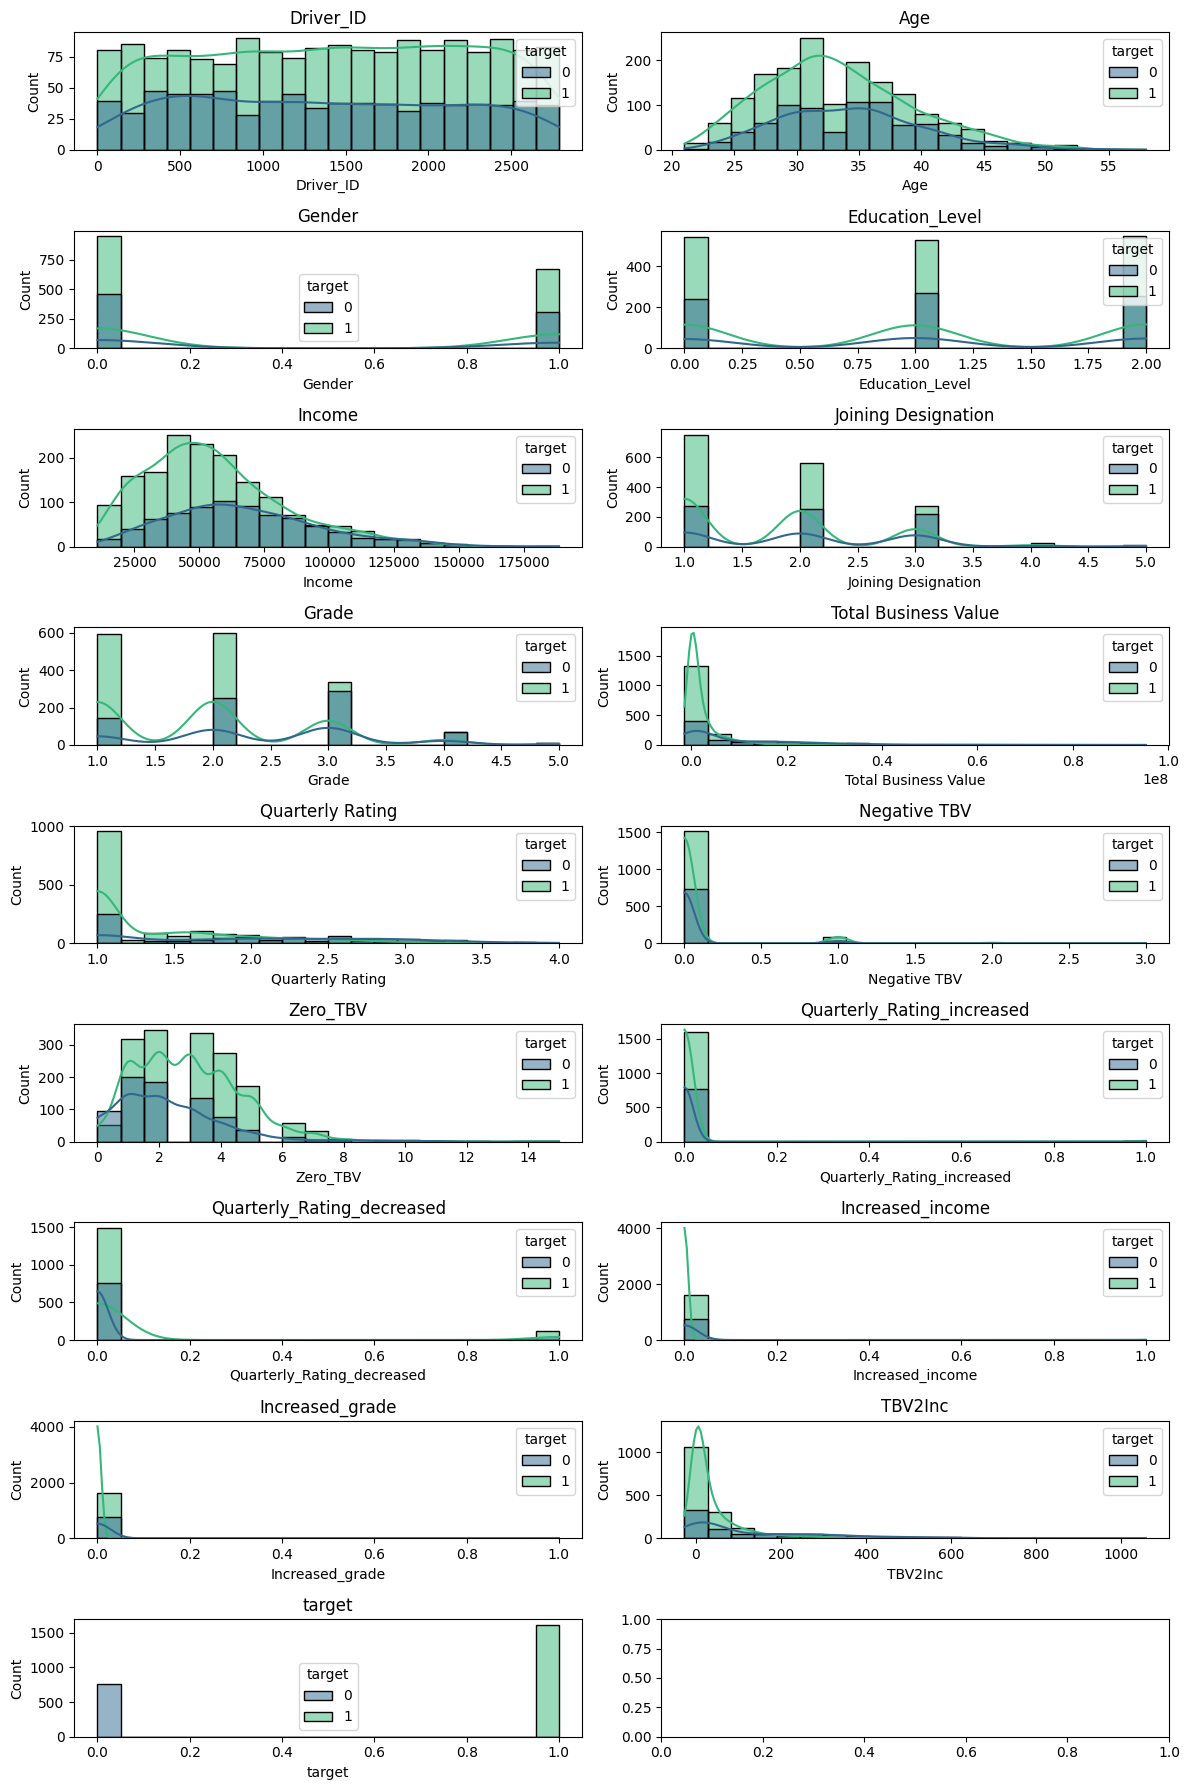

In [ ]:
cols = df_grouped.select_dtypes(include=['int64', 'float64']).columns
# Calculate the number of rows and columns for subplots
num_cols = 2
num_rows = (len(cols) + 1) // 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 18))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot histograms
for index, col in enumerate(cols):
    sns.histplot(data=df_grouped, x=col, bins=20, ax=axes[index], kde=True, hue='target', palette='viridis')
    axes[index].set_title(col)

plt.tight_layout()
plt.show()

<Axes: xlabel='City', ylabel='count'>

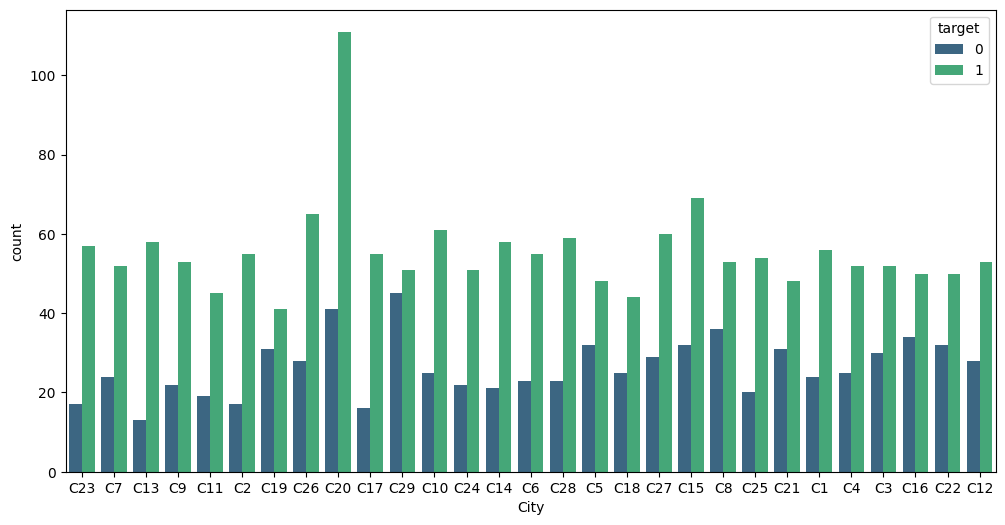

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_grouped, x='City', hue='target', palette='viridis')

**Bi-variate Analysis**

<Axes: xlabel='Grade', ylabel='Income'>

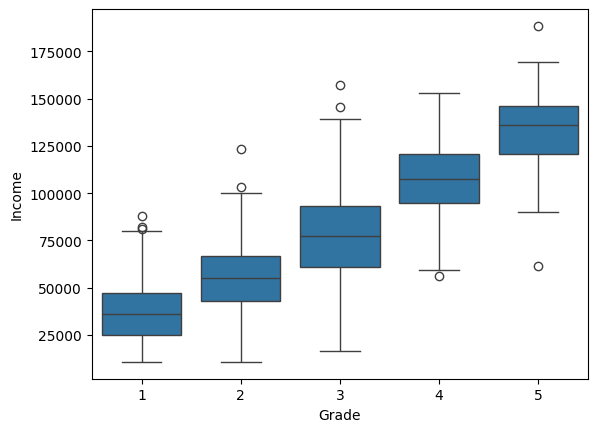

In [ ]:
sns.boxplot(data=df_grouped, x='Grade', y='Income')

<Axes: xlabel='target', ylabel='Income'>

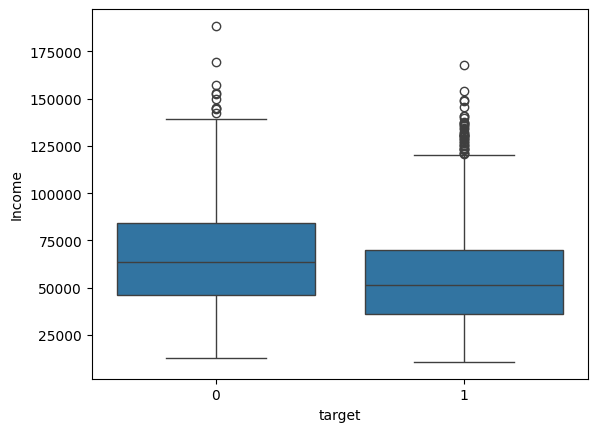

In [ ]:
sns.boxplot(data=df_grouped, x='target', y='Income')

<Axes: xlabel='target', ylabel='Grade'>

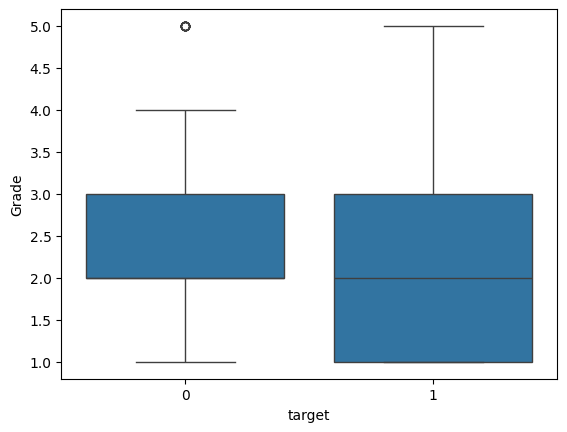

In [ ]:
sns.boxplot(data=df_grouped, x='target', y='Grade')

<Axes: xlabel='target', ylabel='Total Business Value'>

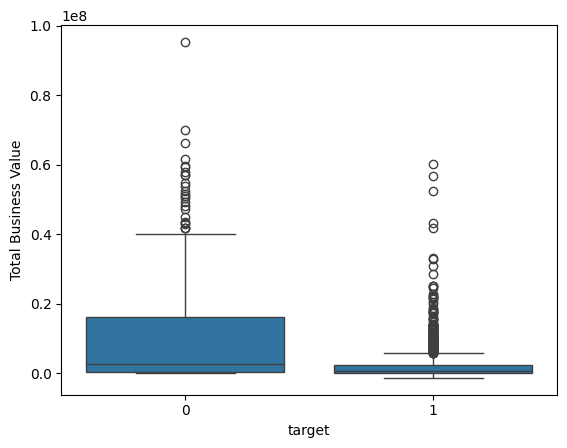

In [ ]:
sns.boxplot(data=df_grouped, x='target', y='Total Business Value')

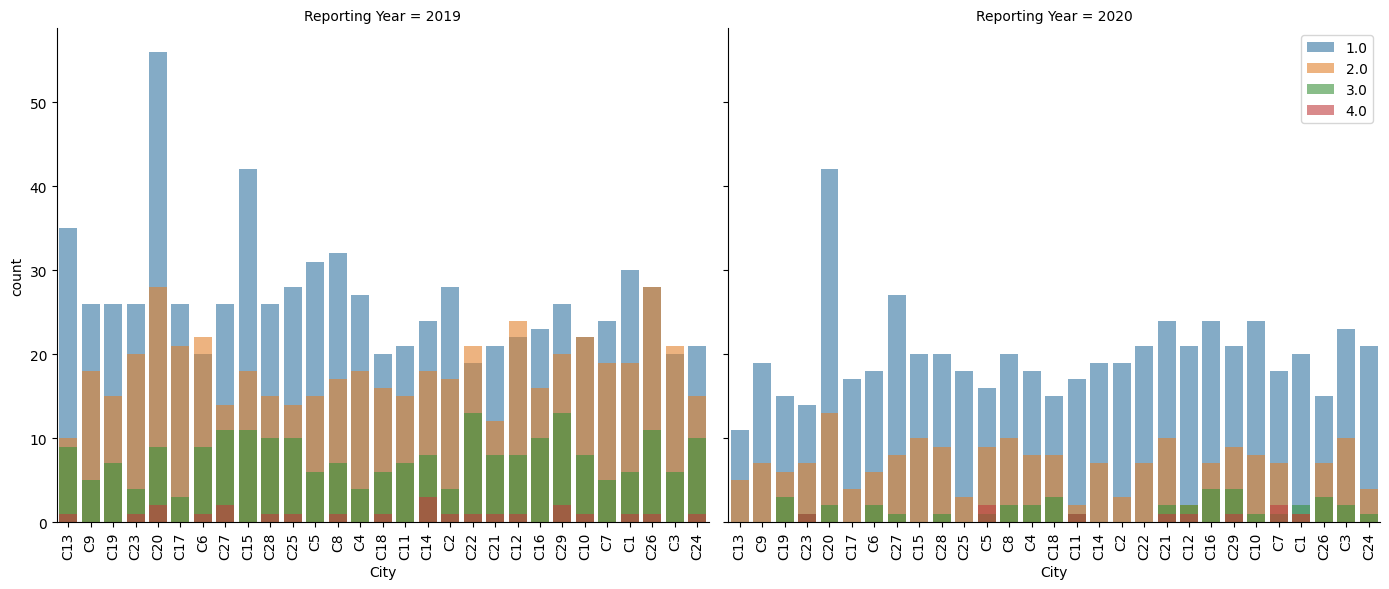

In [ ]:
df_grouped['Reporting Year']=df_grouped['MMM-YY'].dt.year
df_grouped['QR_round'] = round(df_grouped['Quarterly Rating'],0)
g = sns.FacetGrid(df_grouped, col='Reporting Year', hue='QR_round')

# Map a plot type to the FacetGrid
g.map(sns.countplot, 'City', alpha=0.6)

g.set_xticklabels(rotation=90)
g.fig.set_size_inches(14,6)
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.legend()
plt.show()

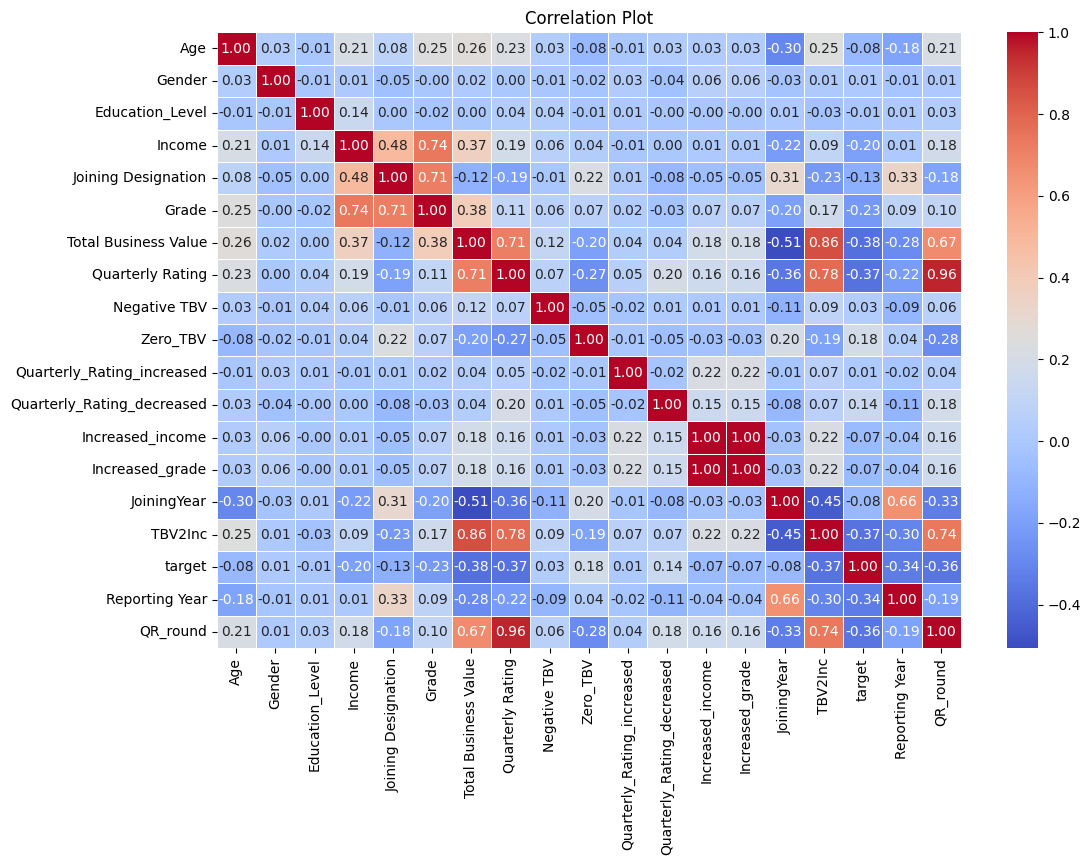

In [ ]:
df_num=df_grouped.drop(['City', 'Driver_ID', 'MMM-YY', 'Dateofjoining', 'LastWorkingDate'],axis=1)
correlation_matrix = df_num.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

**Insights:**

- So we see that there are 57% male employees and 43% female employees.
- The percentages of employees with different education levels are almost same for level 1 & 2.
- 97.3% of the employees who did not get a raise.
- Almost 43% of the employees joined at lowest designation (1). 34% joined at level 2, 20% at level 3 and below 2% joined at higher levels.
- Majority (35%) of the employees currently are at designation level 2, followed by designation level 1 (31%) and 3 (26%). Less than 5% of the employees are currently in higher designations.
- Only 54.6% of the employees received a promotion, while 45.4% did not .However, only 2.6% received a raise in income.
- Number of employees has been increase with increase in year as well as number of reportings.
- The majority of the employees seem to be associated with city C20.
- Scatter plot of Income shows that Income increases with increase in age but after 45-50, we see a subtle decline.
- Scatter plot of Total Business Value shows an increase with increase in Age yet we notice a decline after 45.
- Income decreses with increase in Destination as about 4% of the employees hold higher designations.
- The median of the Income for employees having higher Grades is greater.
- Distribution of Income for enployes at different Education level is about a change of 3-5% with level 0.
- Joining Designation Increases with increase in Grade.
- Max reporting days is 24 days.
- About 55% of the reportings of the employees has got Quarlerly Rating 1.
- Number of reportings increases with increase in Income as well as Total Business Value.

##**2.Data Preprocessing**

**a. Duplicate value check:**

Investigate your dataset for any duplicate entries. It might be useful to first examine duplicates based on a subset of features rather than the entire row,as sometimes complete rows might not be identical, but a subset of attributes could still have repeated patterns.
  - Hint: Duplicate rows can skew the results and create redundancy.

**b. Missing value treatment:**

  - Identify columns with missing values.
  - Decide the best strategy: imputation using central tendencies, deletion,or
  more advanced methods depending on the importance and type of the variable.
  - More focus on smartly imputing the data.
    - Hint: Missing values can influence model training.

**c. Outlier treatment:**

  - Visualize data for detecting outliers using graphical tools
  - Choose an appropriate technique for handling outliers: capping,transformation, or removal. The choice should be backed by a logical reason.
    - Hint: Outliers can skew model outcomes.

**d. Feature engineering:**

  - Flag Creation: Attributes such as feedback_count, ride_frequency,etc.,might benefit from binary flags under specific conditions.
 - Date-related features:Extractingday, month, or year can expose temporal
 patterns.
 - Geolocation Insights: Deriving city or district from GPS data can highlight
 geographictrends.
 - Categorize the "Age" feature into bins suchas: 'Young' (18-30), 'Middle-aged'
 (31-50), 'Senior' (50+).This can help in identifying patterns based on age groups.
 - Feature Mining from Aggregated Data: Derive new features from aggregated data, such as  variations in expenses, shifts in ride frequency, or feedback count changes.
 - Change in Rating (Example): After aggregating, find the difference
 between successive quarterly ratings to capture performance
 trends.
  - Hint: Crafting new variables or modifying existing ones can enhance the model's predictive power.

**e. Data preparation for modeling:**

  - Depending on the model's requirements, consider scaling the features. The choice of scaling technique would vary based on data distribution and
 model sensitivity.
 - Different encoding techniques are suitable for different types of categorical
 variables:
 1. Label Encoding: Use for ordinal categories with a natural order (e.g., Low,
 Medium, High).
 2. One Hot Encoding: Best for nominal categories without inherent order.
 3. Target Encoding: Good for high cardinality features. Replaces categories
 with the mean of the target variable for that category. Beware of overfitting;
 consider regularization or smoothing.

  - Hint: Preparing data in a format suitable for modeling is crucial.

**f. Identify normal vs skewed distributions and understand why?**

For continuous variables, comment on the skewness. For relationships, comment on positive or negative correlations, clusters, or other patterns noticed.

  - Hint: After creating new feature, For them Identify normal vs skewed
 distributions and understand why?

In [ ]:
(df.isna().sum()/len(df))*100

,0
MMM-YY,0.000000
Driver_ID,0.000000
Age,0.319305
Gender,0.272194
City,0.000000
Education_Level,0.000000
Income,0.000000
Dateofjoining,0.000000
LastWorkingDate,91.541039
Joining Designation,0.000000


In [ ]:
# City Encoding
city_mapping = {
    'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 5, 'C6': 6, 'C7': 7, 'C8': 8, 'C9': 9, 'C10': 10,
    'C11': 11, 'C12': 12, 'C13': 13, 'C14': 14, 'C15': 15, 'C16': 16, 'C17': 17, 'C18': 18, 'C19': 19, 'C20': 20,
    'C21': 21, 'C22': 22, 'C23': 23, 'C24': 24, 'C25': 25, 'C26': 26, 'C27': 27, 'C28': 28, 'C29': 29
}

# Map the cities using the dictionary
df_grouped['City'] = df_grouped['City'].map(city_mapping)

In [ ]:
df_grouped['Ranking'] =df_grouped['Grade']+(df_grouped['Joining Designation'])

# Input and Target feature separation

X=df_grouped.drop(['target', 'MMM-YY', 'Dateofjoining', 'LastWorkingDate', 'Education_Level', 'Grade', 'Joining Designation', 'Reporting Year', 'QR_round', 'Driver_ID'], axis=1)
y=df_grouped['target']

In [ ]:
# Record the column names
cols = X.columns

# Initialize StandardScaler
scale = StandardScaler()

# Standardize the training data
X_scaled = scale.fit_transform(X)

# Convert the standardized data back to a DataFrame with column names
X_scaled = pd.DataFrame(data=X_scaled, columns=cols)

##**3. Model building**

**a. Data Splitting:**

Typically,a 70-30 or 80-20 split ratio is employed. If the target variable shows class imbalance,consider a stratified split.
  - Hint: Before model building,split the dataset into training and validation sets.

**b. Addressing Class Imbalance:**
- ExploratoryDataAnalysis(EDA): Check distribution of target variable using plots.
- Oversampling with SMOTE: Use the SMOTE method to generate synthetic samples for the minority class.
- Algorithmic Approach: Use algorithms that can set `class_weights`, giving more importance to the minority class.
  - Hint: Imbalanced data sets can lead the model to predict mostly the majority class. This can lead to misleadingly high accuracy but poor generalization.

**c. Ensemble Learning: Bagging**

- Use Bagging Classifier or RandomForestClassifier from sklearn.ensemble.
- Adjust hyperparameters like the n_estimators, max_depth, maxsamples,max_features.
- Fit the classifier on training data and evaluate on validation data.

**d. Ensemble Learning: Boosting**

- Start with ‘GradientBoostingClassifier’ from ‘sklearn.ensemble’.
- For advanced models, consider using XGBoostor, LightGBM.
- Tune hyperparameters like learning_rate, n_estimators, and tree-specificparameters.
- Evaluate model on validation set to check its performance.

  - Hint: Boosting builds multiple models in a sequential manner where each new
 model attempts to correct the errors of the previous ones. GradientBoosting,
 AdaBoost,XGBoost are examples.

**e. Feature Importance with Boosting Algorithms:**

- Once model is trained, extract feature importance.
- Plot feature importances in descending order.
- Analyze top features and their influence on the model's predictions.
  - Hint:  Boosting algorithms like XGBoost can provide feature importance scores which can be beneficial in understanding which predictors have the most
 influence.








In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
y_train.value_counts()

,count
target,
1,1289
0,615


**Model Creation and ROC AUC Analysis**

In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=150, min_samples_leaf=3, criterion='entropy', n_jobs=-1, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the train and validation set
pred_train = rf_classifier.predict(X_train)
pred_test = rf_classifier.predict(X_test)

print(f'Train Accuracy: {accuracy_score(pred_train, y_train)}')
print(f'Validation Accuracy: {accuracy_score(pred_test, y_test)}')

Train Accuracy: 0.9495798319327731
Validation Accuracy: 0.8574423480083857


In [ ]:
# Feature Importance

# Calculate Feature Importance
for score, name in zip(rf_classifier.feature_importances_, X_train.columns):

print(round(score,2),name)

0.05 Age
0.01 Gender
0.06 City
0.08 Income
0.16 Total Business Value
0.1 Quarterly Rating
0.0 Negative TBV
0.09 Zero_TBV
0.0 Quarterly_Rating_increased
0.02 Quarterly_Rating_decreased
0.0 Increased_income
0.0 Increased_grade
0.25 JoiningYear
0.13 TBV2Inc
0.04 Ranking


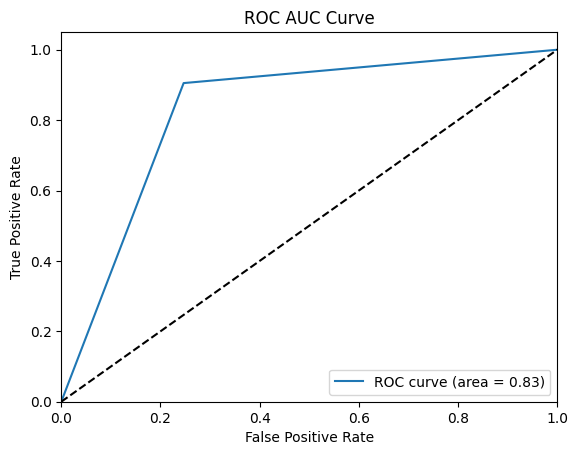

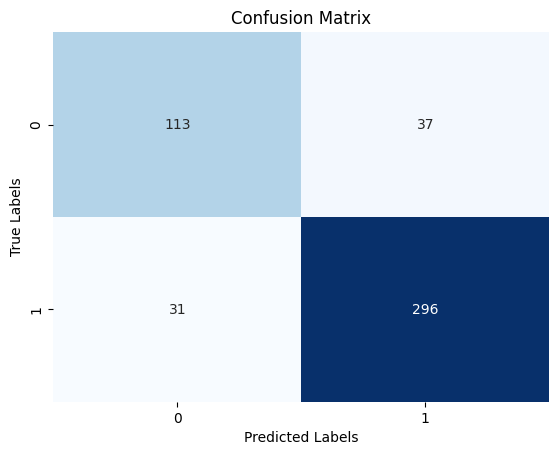


 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       150
           1       0.89      0.91      0.90       327

    accuracy                           0.86       477
   macro avg       0.84      0.83      0.83       477
weighted avg       0.86      0.86      0.86       477



In [ ]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, pred_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, pred_test)
print()
# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate classification report and confusion matrix
print("\n Classification Report:")
print(classification_report(y_test, pred_test))

In [ ]:
# LightGMB

# Define the LightGBM classifier with hyperparameters
lgb_classifier = lgb.LGBMClassifier(n_estimators=150, boosting_type='gbdt', learning_rate=0.02, random_state=42)

# Train the classifier
lgb_classifier.fit(X_train, y_train)

# Predict on the train and validation set
pred_train = lgb_classifier.predict(X_train)
pred_test = lgb_classifier.predict(X_test)

# Evaluate the model
print(f'Train Accuracy: {accuracy_score(pred_train, y_train)}')
print(f'Validation Accuracy: {accuracy_score(pred_test, y_test)}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1289, number of negative: 615
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 1904, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.676996 -> initscore=0.740000
[LightGBM] [Info] Start training from score 0.740000
Train Accuracy: 0.9343487394957983
Validation Accuracy: 0.8658280922431866


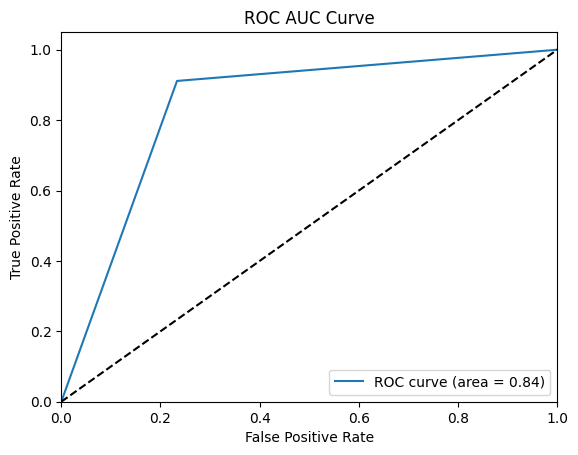

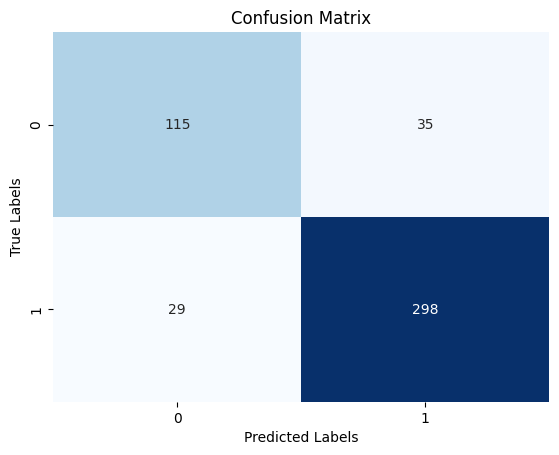


 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       150
           1       0.89      0.91      0.90       327

    accuracy                           0.87       477
   macro avg       0.85      0.84      0.84       477
weighted avg       0.86      0.87      0.87       477



In [ ]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, pred_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, pred_test)
print()
# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate classification report and confusion matrix
print("\n Classification Report:")
print(classification_report(y_test, pred_test))

In [ ]:
#XGBoost

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=50, learning_rate=0.095, random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Predict on the train and validation set
pred_train = xgb_classifier.predict(X_train)
pred_test = xgb_classifier.predict(X_test)

# Evaluate the model
print(f'Train Accuracy: {accuracy_score(pred_train, y_train)}')
print(f'Validation Accuracy: {accuracy_score(pred_test, y_test)}')

Train Accuracy: 0.9332983193277311
Validation Accuracy: 0.8616352201257862


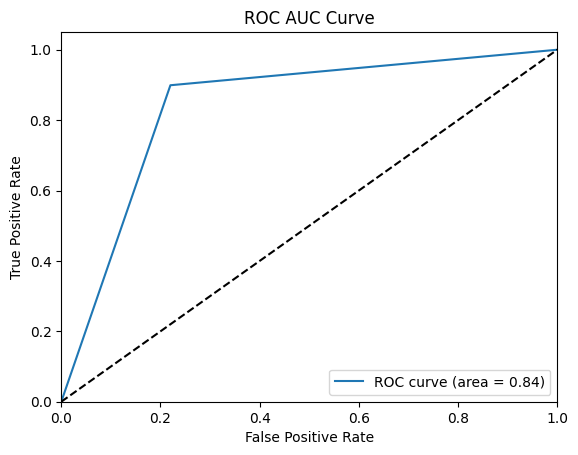

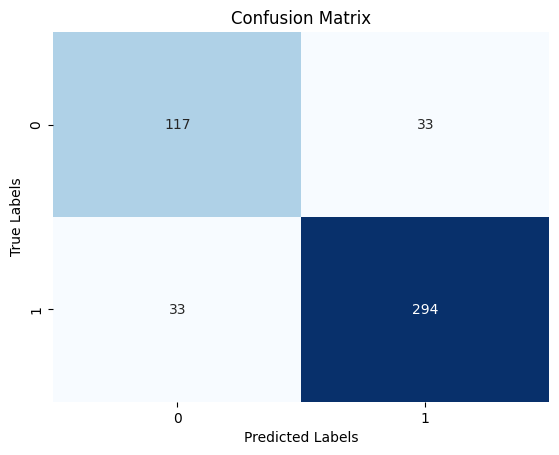


 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       150
           1       0.90      0.90      0.90       327

    accuracy                           0.86       477
   macro avg       0.84      0.84      0.84       477
weighted avg       0.86      0.86      0.86       477



In [ ]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, pred_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, pred_test)
print()
# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate classification report and confusion matrix
print("\n Classification Report:")
print(classification_report(y_test, pred_test))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.131, random_state=42)

# Fit the classifier to the training data
gb_clf.fit(X_train, y_train)

# Predict the labels for the test set
pred_test = gb_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, pred_test)
print("Accuracy:", accuracy)

Accuracy: 0.8721174004192872


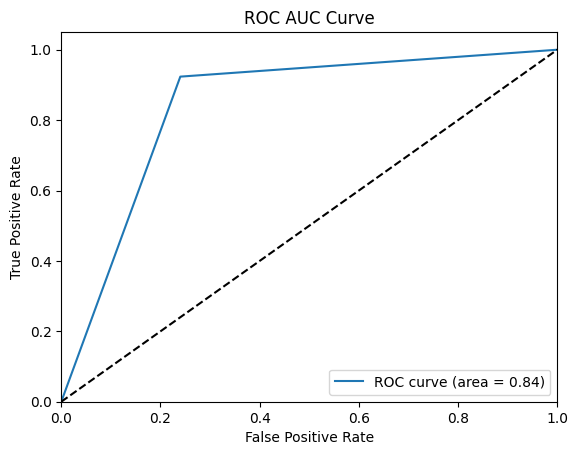

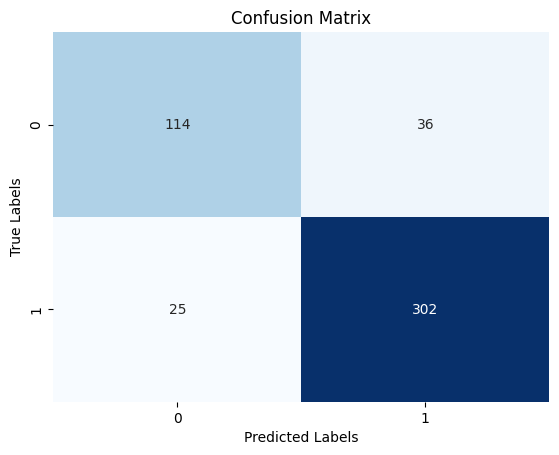


 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       150
           1       0.89      0.92      0.91       327

    accuracy                           0.87       477
   macro avg       0.86      0.84      0.85       477
weighted avg       0.87      0.87      0.87       477



In [ ]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, pred_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, pred_test)
print()
# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate classification report and confusion matrix
print("\n Classification Report:")
print(classification_report(y_test, pred_test))

In [ ]:
# Adaptive Boosting

from sklearn.ensemble import AdaBoostClassifier

# Instantiate the AdaBoost classifier
adaboost_clf = AdaBoostClassifier(n_estimators=80, learning_rate=0.84, random_state=42)  # You can specify the number of estimators (weak learners)

# Fit the classifier to the training data
adaboost_clf.fit(X_train, y_train)

# Predict the labels for the test set
pred_test = adaboost_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, pred_test)
print("Accuracy:", accuracy)

Accuracy: 0.8805031446540881


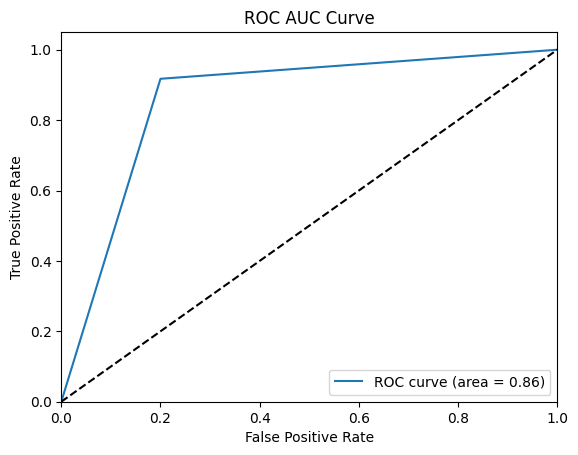

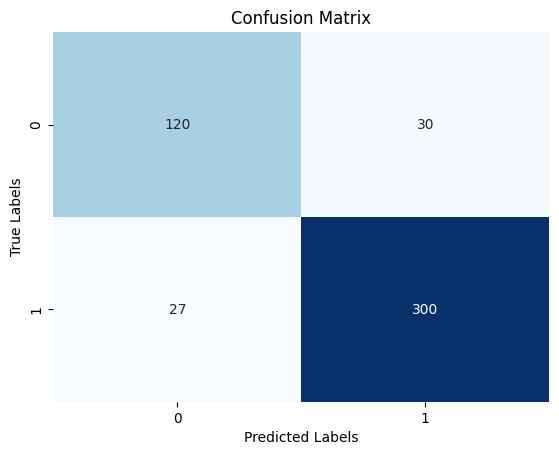


 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       150
           1       0.91      0.92      0.91       327

    accuracy                           0.88       477
   macro avg       0.86      0.86      0.86       477
weighted avg       0.88      0.88      0.88       477



In [ ]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, pred_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, pred_test)
print()
# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate classification report and confusion matrix
print("\n Classification Report:")
print(classification_report(y_test, pred_test))

In [ ]:
# Voting Classier

# Define the Voting Classifier with the base classifiers
voting_classifier = VotingClassifier(
    estimators=[
        # ('rf', rf_classifier),
        ('lgb', lgb_classifier),
        ('ada', adaboost_clf),
        ('gbdt', gb_clf),
        # ('xgb', xgb_classifier)
    ],
    voting='hard',
    n_jobs=-1,
    # weights=[1,2,2,1,1]
)

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Predict on the test set
pred_train = voting_classifier.predict(X_train)
pred_test = voting_classifier.predict(X_test)

# Evaluate the model
print(f'Train Accuracy: {accuracy_score(pred_train, y_train)}')
print(f'Validation Accuracy: {accuracy_score(pred_test, y_test)}')

Train Accuracy: 0.9044117647058824
Validation Accuracy: 0.8805031446540881


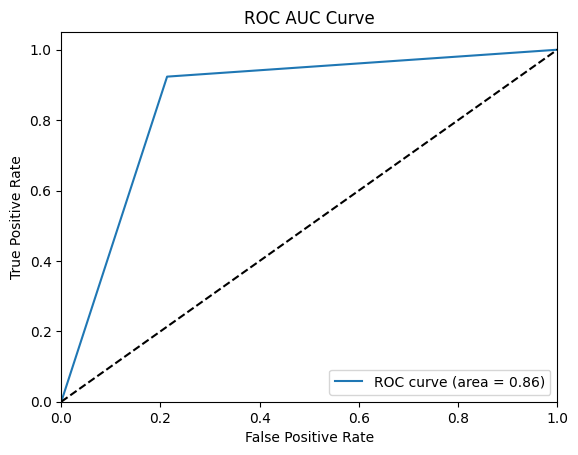

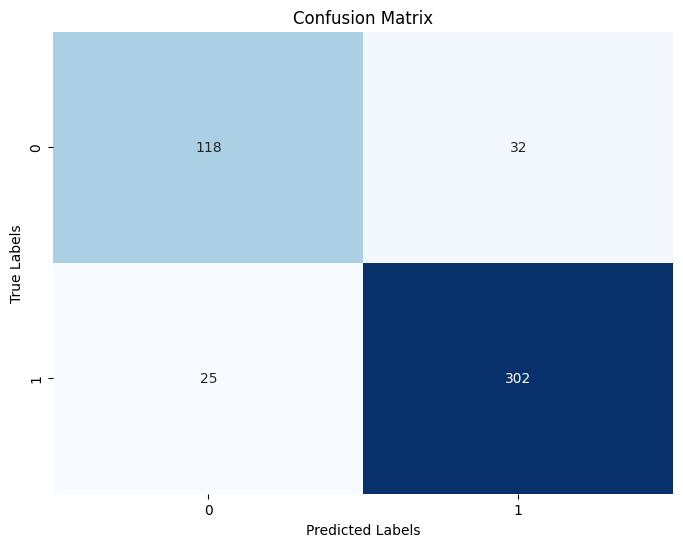


 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       150
           1       0.90      0.92      0.91       327

    accuracy                           0.88       477
   macro avg       0.86      0.86      0.86       477
weighted avg       0.88      0.88      0.88       477



In [ ]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, pred_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, pred_test)
print()
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate classification report and confusion matrix
print("\n Classification Report:")
print(classification_report(y_test, pred_test))

**Model Comparision**

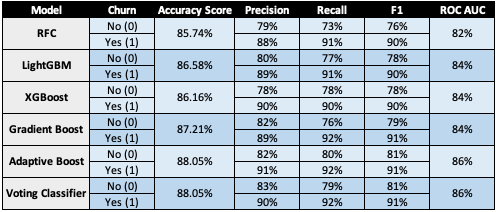

##**4. Results Interpretation & Stakeholder Presentation**

 **a. Understand the Business Context**

 - Understand Company's objectives in evaluating its drivers: Are they looking to reward topper formers? Address underperformers? Improve customer satisfaction?
 - Recognize the challenges faced by drivers and the factors affecting their
 performance.
  - Hint: The primary concern for Company is to ensure a quality driving experience for its users and retaining efficient drivers.

**b. Interpreting Model Coefficients**
- Analyze the coefficients from the model. Features with higher coefficients might indicate significant influencers on driver performance.
- Understand the relationship direction from the sign of coefficients. For instance,does higher education level positively or negatively correlate with
 performance?
 - Hint: Understanding which features have the most impacton driver performance can help Company in strategizing training and incentives.

 **c. Visual Representations**

- Use plots to represent the distribution of top drivers by city or education level.
- Show case the correlation between driver ratings and factors like age, income, and education through scatter plots or heatmaps.
    - Hint: Visuals can often convey information more effectively than numbers alone.

**d. Trade-off Analysis**
- Discuss the implications of recruiting more educated drivers versus the costs
 associated with it.
- Analyze the benefits of investing in driver training compared to potential
 increases in customer satisfaction.

  - Hint: Decisions about driver incentives, training, or recruitment may come with trade-offs.

**e. Recommendations**

- Suggest specific strategies like targeted training programs, improved
 recruitment processes, or incentive schemes based on model insights.
- Provide evidence from the data analysis, such as cities with the most potential for growth or key age demographics to target.

  - Hint: Recommendations should align with Ola's business goals and be based on
 data-driven insights.

 **f. Feedback Loop**

- Propose setting up a periodic review process to assess the model's relevance
 and performance.
- Recommend surveys or feedback mechanisms to collect data on new trends,
 driver concerns, and customer feedback to refine the model in the future.

    - Hint: The transportation industry is dynamic. It's essential to
 ensure continuous monitoring and adaptability..

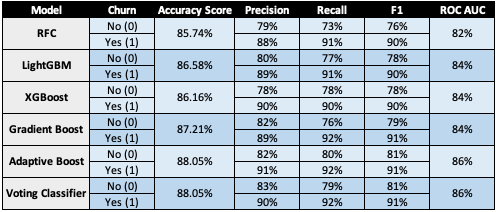

**Model Performance:**

Each model (Random Forest Classifier, LightGBM, XGBoost, Gradient Boost, Adaptive Boost, and Voting Classifier) achieves relatively high accuracy scores ranging from 85.74% to 88.05% for predicting churn.

**Churn Prediction Metrics:**

1. Precision: The precision measures the proportion of correctly predicted churn cases among all predicted churn cases. It ranges from 78% to 91% for predicting churn, indicating the models' ability to avoid false positives.
2. Recall: The recall measures the proportion of correctly predicted churn cases among all actual churn cases. It ranges from 73% to 92%, indicating the models' ability to identify actual churn cases.
3. F1 Score: The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics. It ranges from 77% to 91%.
4. ROC AUC: The ROC AUC (Area Under the Receiver Operating Characteristic Curve) measures the models' ability to distinguish between churn and non-churn instances. It ranges from 82% to 86%, indicating good performance in classifying instances.

**Comparison Across Models:**

Adaptive Boost and Voting Classifier consistently achieve the highest accuracy score, precision, recall, F1 score, and ROC AUC among the models considered. Random Forest Classifier, LightGBM, XGBoost, and Gradient Boost also perform well but have slightly lower performance metrics compared to Adaptive Boost and Voting Classifier.

**Model Comparison:**

Adaptive Boost and the Voting Classifier stands out as the best-performing model overall, with consistently high scores across all metrics for both predicting churn and non-churn.




**Insights and Recommendation**

**Performance Metrics**

Based on the performance metrics, the OLA may consider using Adaptive Boost as the primary model for churn prediction, as it achieves the highest scores across most evaluation metrics.
Additionally, RandomForestClassifier, Gradient Boost, and the Voting Classifier are suitable alternatives, offering competitive performance for churn prediction.

**Feature Importance**

JoiningYear (0.25): This feature has the highest importance score, indicating that the year in which the drivers joined the company is the most significant predictor of the target variable.

Total Business Value (0.16): Total business value follows closely in importance, suggesting that the overall revenue generated by the drivers is a strong predictor of the target variable.

TBV2Inc (0.13): TBV2Inc, which lis the ratio of total business value to income, has a notable importance score, indicating it's influence on the target variable.

Quarterly Rating (0.1): Quarterly rating is also an important predictor, suggesting that the periodic performance ratings of the drivers may be indicative of their behavior or likelihood to churn.

Zero_TBV (0.09): Zero_TBV, indicating the number of instances where total business value is zero for a driver, has a relatively high importance score, implying that this condition is a significant predictor of the target variable.

City (0.06): The driver's city of residence has moderate importance, indicating that geographical location may influence driver behavior and the likelihood of churn.

Age (0.05): Age follows with moderate importance, suggesting that the age demographic of drivers also plays a role in predicting the target variable.

Ranking (0.04): Ranking has a lower importance score compared to other features but still contributes to the model's predictive power, suggesting that drivers rankings have some influence on churn behavior.

Quarterly_Rating_decreased (0.02): This feature represents instances where the quarterly rating has decreased, indicating a slight influence on the target variable.

Gender (0.01): Gender has the lowest importance score among the features considered, implying that it has minimal impact on predicting the target variable.

Negative TBV, Increased_income, Increased_grade, Quarterly_Rating_increased: These features have zero importance, indicating that they do not significantly contribute to predicting the target variable based on the current model.

**Recommendation:**

Based on the feature importance analysis, OLA may prioritize strategies and interventions aimed at improving total business value, retaining drivers who joined in earlier years, and managing quarterly ratings effectively.

##**Questionnaire**



1. What percentage of drivers have received a quarterly rating of 5?

  None of the drivers in the given data set have recieved a Quarterly rating of 5.0.

2. Comment on the correlation between Age and Quarterly Rating.

  Weak Positive Correlation: The correlation coefficient of 0.23 indicates a weak positive linear relationship between Age and Quarterly Rating. As the value is positive, it suggests that as Age increases, there tends to be a slight increase in Quarterly Rating on average.

3. Name the city which showed the most improvement in Quarterly Rating over the past year.

  C3 and C21 showed the most improvement in Quarterly Rating over the past year.

4. Drivers with a Grade of ‘A’ are more likely to have a higher Total Business Value. (T/F)

  False. A higher total business value is more likely to be associated with drivers having a higher grade but not vice versa. It can be visualized from the graph density of the drivers for all grades is more towards the low total business value however the maximum total business value increases with the increase in grade.

5. If a driver's Quarterly Rating drops significantly, how does it impact their Total Business Value in the subsequent period?

  If a driver's Quarterly Rating drops significantly, the Total Business Value also drops significantly for the driver.

6. From Company's perspective, which metric should be the primary focus for driver retention?

  ROC AUC
  Precision
  Recall
  F1 Score

  In scenarios where the consequences of false negatives (predicting a driver will not churn but they actually do) outweigh those of false positives (predicting a driver will churn but they do not), maximizing Recall may indeed be more appropriate.

  Maximizing Recall would prioritize identifying all potentially churn-prone drivers, even if it means some false positives occur. This approach aims to minimize the risk of missing drivers who are genuinely at risk of leaving the platform.

7. How does the gap in precision and recall affect Company's relationship with its drivers and customers?

  The gap between precision and recall can have significant impact on Company's relationship with its drivers and customers:

  Driver Relationship:

  High Precision, Low Recall: If Company prioritizes precision over recall, it means that the company is focusing on accurately identifying drivers who meet certain criteria (e.g., high-performance drivers, drivers with positive customer ratings). This can lead to better driver satisfaction as it ensures that drivers who receive incentives, rewards, or recognition truly deserve it based on their performance. However, it may also result in missing out on some deserving drivers who might be overlooked due to the stringent criteria, potentially leading to dissatisfaction among those drivers.

  Low Precision, High Recall: Conversely, if Company prioritizes recall over precision, it means that the company is casting a wider net to include a larger number of drivers who meet certain criteria. While this approach may ensure that deserving drivers are not overlooked, it may also lead to rewarding drivers who do not truly deserve it, potentially causing dissatisfaction among drivers who feel that rewards are being distributed unfairly.

  Customer Relationship:

  High Precision, Low Recall: A high precision means that Company's algorithms accurately identify and recommend drivers who provide exceptional service, leading to higher customer satisfaction. Customers are more likely to receive a reliable and high-quality service when matched with drivers who have a proven track record of performance. However, if the recall is low, it means that Ola may miss out on recommending some high-quality drivers, leading to potential dissatisfaction among customers who receive subpar service from drivers who were not identified by the algorithm.

  Low Precision, High Recall: A focus on high recall ensures that Company's algorithms cast a wider net to include a larger pool of drivers, increasing the chances of matching customers with available drivers. While this approach may lead to more reliable service availability, it also increases the likelihood of recommending drivers who may not provide the best service quality. This could result in customer dissatisfaction if they have negative experiences with drivers who were recommended by the algorithm based on high recall but do not meet the expected service standards.

  In summary, the gap between precision and recall can influence Company's relationship with its drivers and customers by impacting the fairness of rewards and incentives for drivers, as well as the quality and reliability of service for customers. Ola must strike the right balance between precision and recall to ensure a positive experience for both drivers and customers.

8. Besides the obvious features like "Number of Rides", which lesser-discussed features might have a strong impact on a driver's Quarterly Rating?

  The below features might have a strong impact on a driver's Quarterly Rating

  - Response Time
  - Route Efficiency
  - Vehicle Cleanliness and Maintenance
  - Communication Skills
  - Safety and Driving Behavior
  - Personalization and Customer Service

9. Will the driver's performance be affected by the City they operate in? (Yes/No)

  No. The driver's performance is not affected by the City they operate in as it can be inferred from the box plot that all the cities share a similar range of Quarterly Rating among it's drivers.

10. Analyze any seasonality in the driver's ratings. Do certain times of the year correspond to higher or lower ratings, and why might that be?

  Not much seasonality is seen in the driver's ratings however in the months of 'July,' 'August' and 'September' for both the years 2019 and 2020 there is a decline than usual in the 2.0 Quarterly Rating of the driver's.